In [27]:
import os
import numpy as np
import nibabel as nib
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [28]:
path = "../data/"
file = "1010_brain_mr_06.nii.gz"

get_file = lambda path, filename : os.path.join(path,filename)

def show_slices(matrix):
    x,y,z = [int(num/2) for num in matrix.shape]
    slices = matrix[x,:,:], matrix[:,y,:], matrix[:,:,z]
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap='gray', origin="upper")
        
def normalize_3d_matrix(matrix):
    x,y,z = matrix.shape
    matrix = StandardScaler().fit_transform(np.reshape(matrix, (-1,1)))
    return np.reshape(matrix, (x,y,z))


In [29]:
ct_image = nib.load(get_file(path, file))

In [30]:
rawArray = nib.squeeze_image(ct_image).get_fdata()
rawArray.shape

(256, 320, 192)

In [31]:
normArray = normalize_3d_matrix(rawArray)

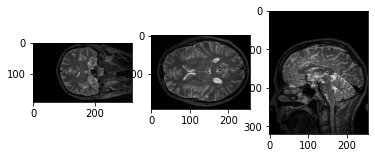

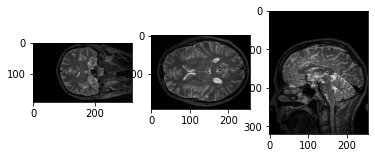

In [32]:
show_slices(normArray)
show_slices(rawArray)

In [33]:
normArray.mean()

3.608224830031759e-16

In [34]:
normArray.std()

0.9999999999999973

In [35]:
normArray.min()

-0.6633361150691145

In [36]:
normArray.max()

8.478818703233202